### HR-аналитика

**Описание исследования:**

Нашему отделу необходимо проанализировать и выявить причины ухода сотрудников из компании "Работа с заботой". Для проекта компания предоставляет нам тренировочные и тестовые данные для наших моделей. Основной запрос от бизнеса уменьшить кадровый отток. Для решения данной задачи необходимо построить модели, предсказывающие удовлетворённость сотрудников и будет ли он увольняться. 

**Цель исследования:**

Уменьшить отток кадров из компании "Работа с заботой"

**Задачи исследования:**
- Исследовать все данные нам признаки
- Подготовить данные для построения моделей
- Построить модель, предсказывающую уровень удовлетворённости сотрудника
- Составить портрет "уволившегося сотрудника"
- Построить модель, предсказывающую уволится сотрулник или нет

________________________________________________

**Данное исследование разделим на несколько частей.**

***Часть 1. Загрузка данных:***
* [Загрузка библиотек](#Введение)
* [Изучение общей информации о данных](#Первичный_анализ)

***Часть 2. Подготовка данных:***
* [Удаление дубликатов, пропусков, поиск аномалий](#Предобработа_данных)
* [Визуализация данных, поиск взаимосвязей между данными](#Исследовательский_анализ_данных)
* [Объединение таблиц](#Объединение_таблиц)
* [Создание и анализ матрицы корреляции](#Корреляционный_анализ)

***Часть 3. Обучение модели и анализ признаков:***
* [Создание пайнплайна для выявление наилучшей модели машинного обучения](#Модель_машинного_обучение)
* [Создание shap графиков и их анализ](#Анализ_важности_признаков)
* [Сегментация пользователей, анализ предпочтений у групп](#Сегментация_покупателейв) 

***Выводы:***
* [Итоговые выводы](#Выводы) 

# Введение

In [1]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy as sc
    import seaborn as sns
    import phik
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
    from sklearn.impute import SimpleImputer 
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
    from sklearn.metrics import roc_auc_score, make_scorer
    from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegressionCV, LinearRegression
except:
    !pip install phik -q
    !pip install -U scikit-learn==1.1.3 -q
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy as sc
    import seaborn as sns
    import phik
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
    from sklearn.impute import SimpleImputer 
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
    from sklearn.metrics import roc_auc_score, make_scorer
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.linear_model import LogisticRegressionCV
    
RANDOM_STATE = 42
TEST_SIZE = 0.25

# Первичный_анализ

Признаки в датасетах:

- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

In [2]:
try:
    data_train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
except:
    data_train = pd.read_csv('C:/Users/simuk/Desktop/IT/проект/train_job_satisfaction_rate.csv')

In [3]:
def info_about_df(df):
    display(df.head(10))
    df.info()
    discret_columns = ['supervisor_evaluation', 'employment_years']

    numeric_columns = df.select_dtypes(include=['number']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    try:
        numeric_columns = numeric_columns = list(set(numeric_columns) - set(discret_columns))
    except:
        pass

    for column in numeric_columns:
        plt.figure(figsize=(12, 15))
        plt.hist(df[column], bins=20, color='lightcoral', edgecolor='black')
        plt.title(f'Гистограмма для колонки {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.show()
    try:
            for column in discret_columns:
                plt.figure(figsize=(10, 14))
                sns.countplot(data=df, x=column, color='deepskyblue')
                plt.title(f'Барплот для колонки {column}')
                plt.xlabel(column)
                plt.ylabel('Частота')
                plt.show()
    except:
        pass
    
    for column in categorical_columns:
        plt.figure(figsize=(15, 14))
        sns.countplot(data=df, x=column, color='skyblue')
        plt.title(f'Барплот для колонки {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.xticks(rotation=45, ha='right')
        plt.show()


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,junior,medium,2,no,no,1,24000,0.58
1,hr,junior,high,2,no,no,5,38400,0.76
2,sales,junior,low,1,no,no,2,12000,0.11
3,technology,junior,low,4,no,no,2,18000,0.37
4,hr,junior,medium,1,no,no,3,22800,0.20
5,hr,middle,low,7,no,no,4,30000,0.78
6,sales,sinior,medium,9,no,no,3,56400,0.56
7,purchasing,middle,high,9,no,no,3,52800,0.44
8,hr,junior,low,1,no,no,2,13200,0.14
9,technology,middle,high,6,no,no,3,54000,0.47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 281.4+ KB


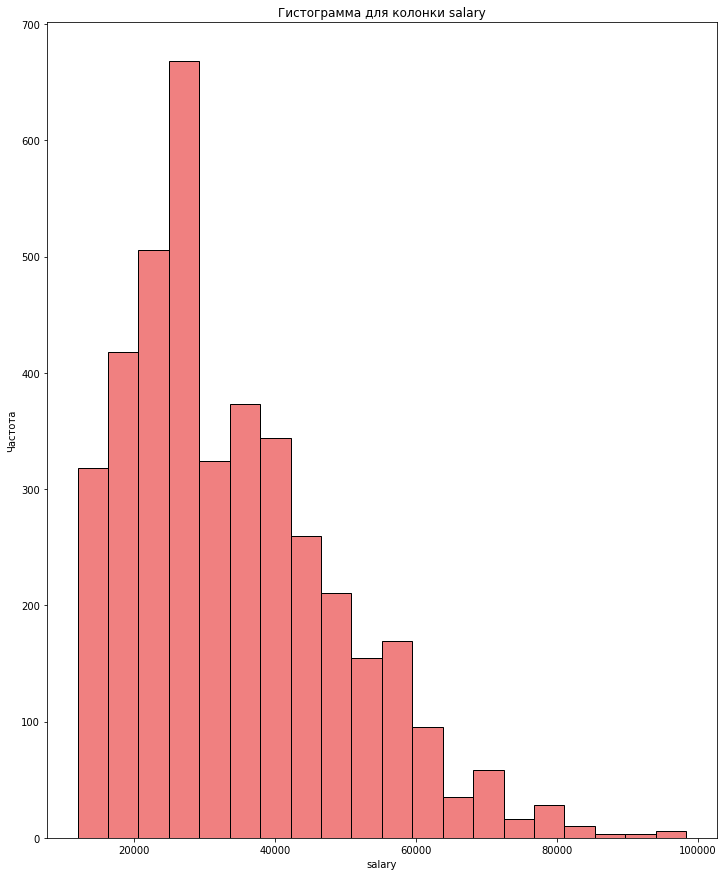

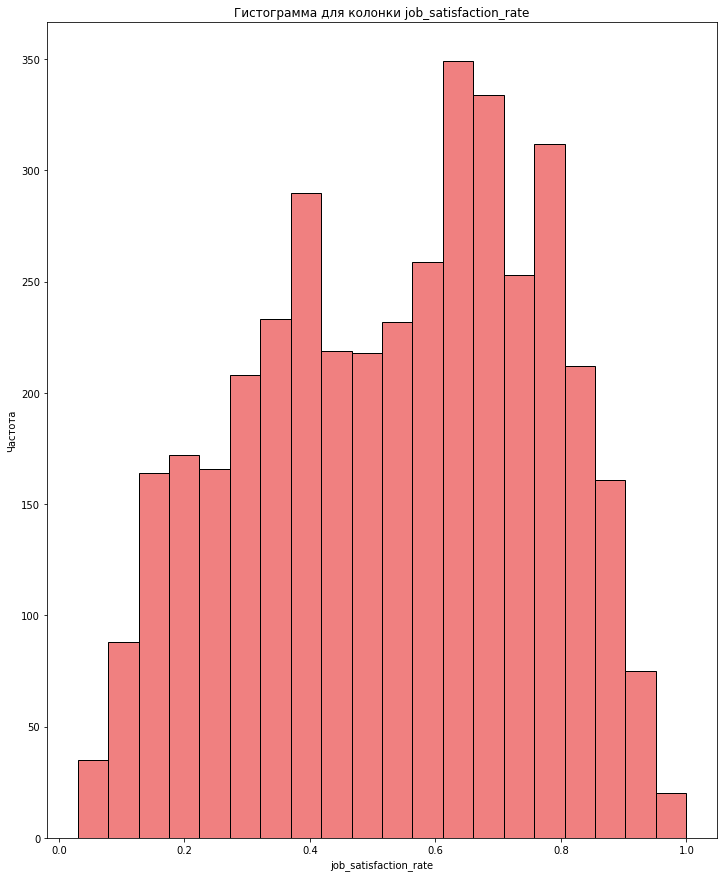

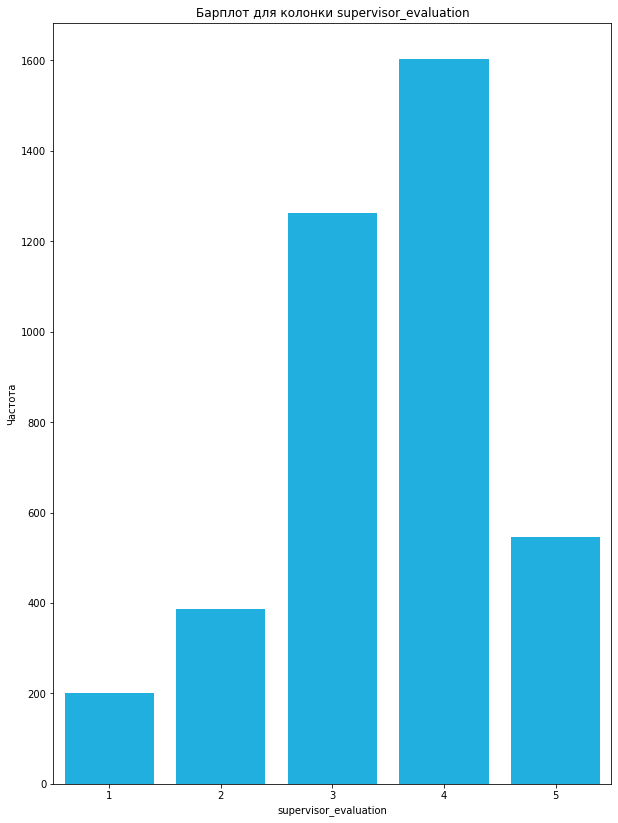

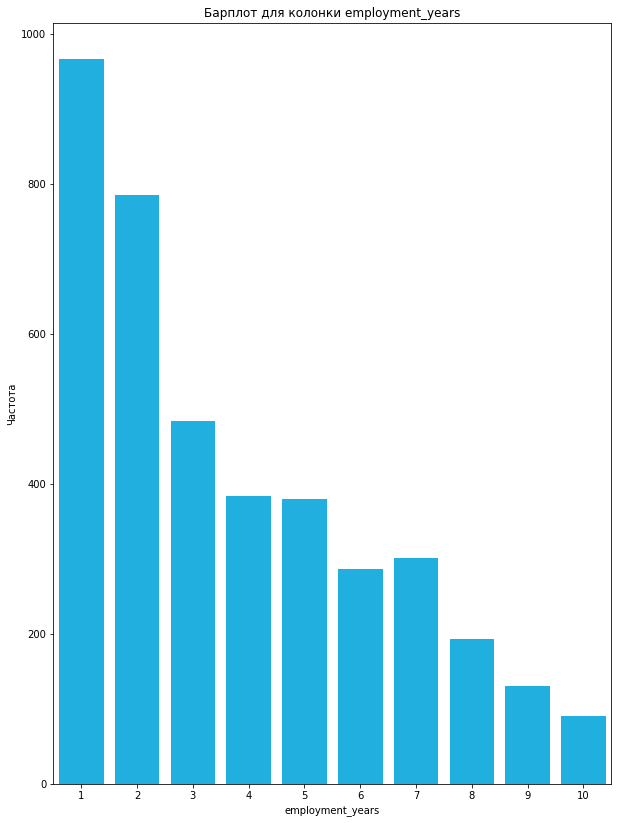

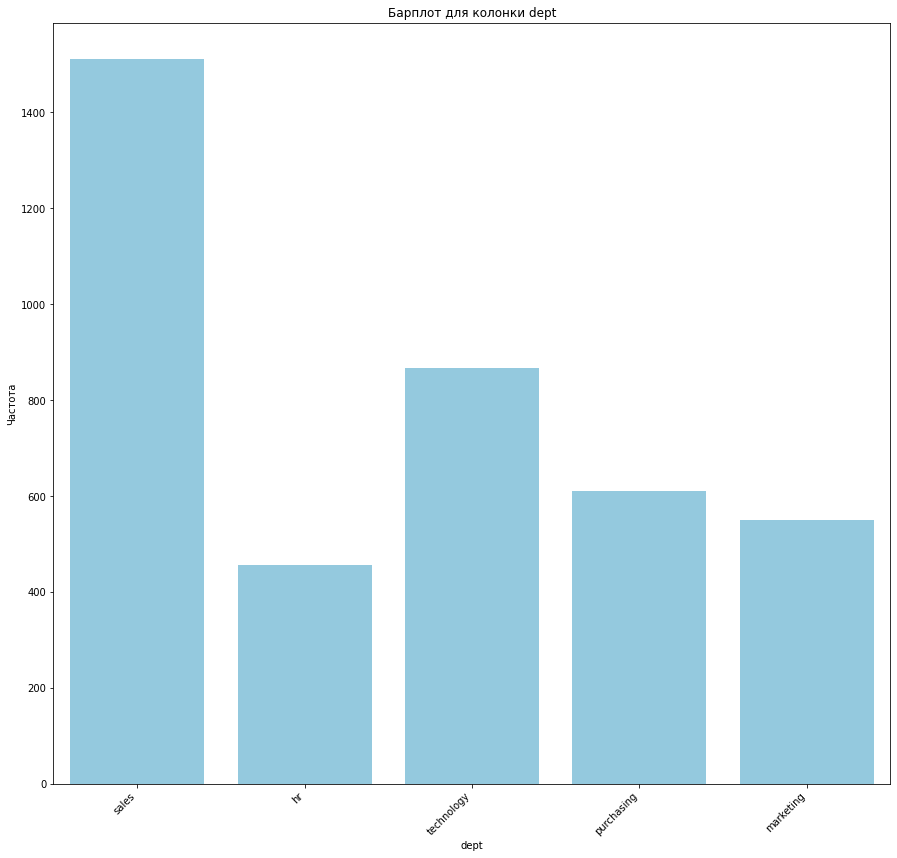

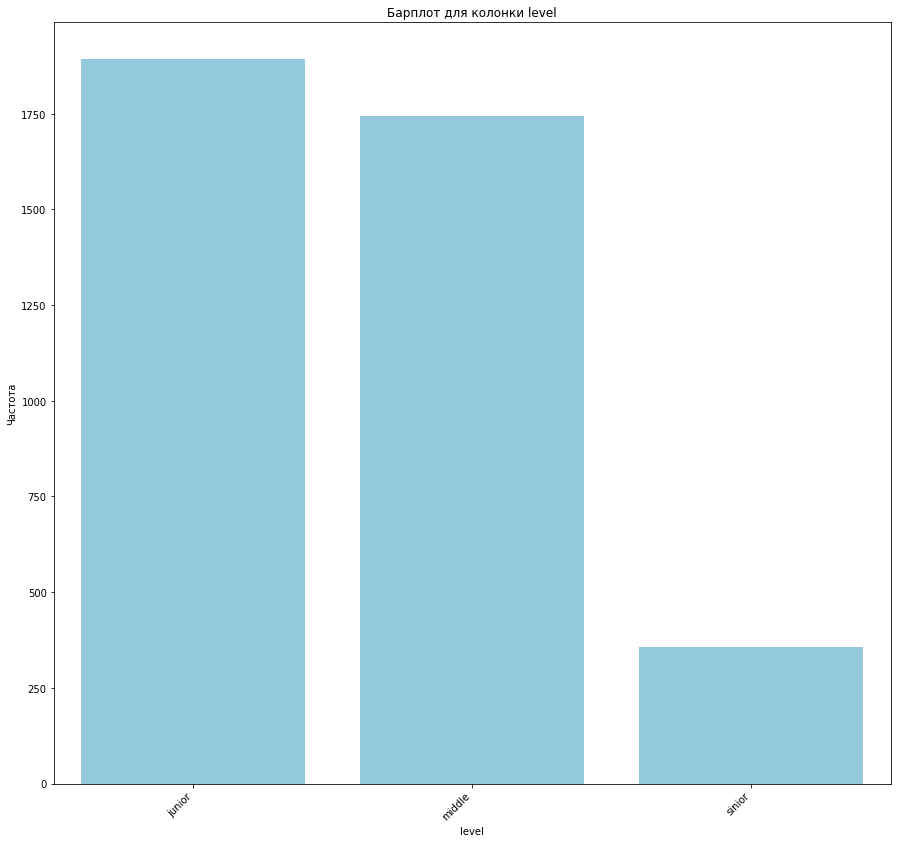

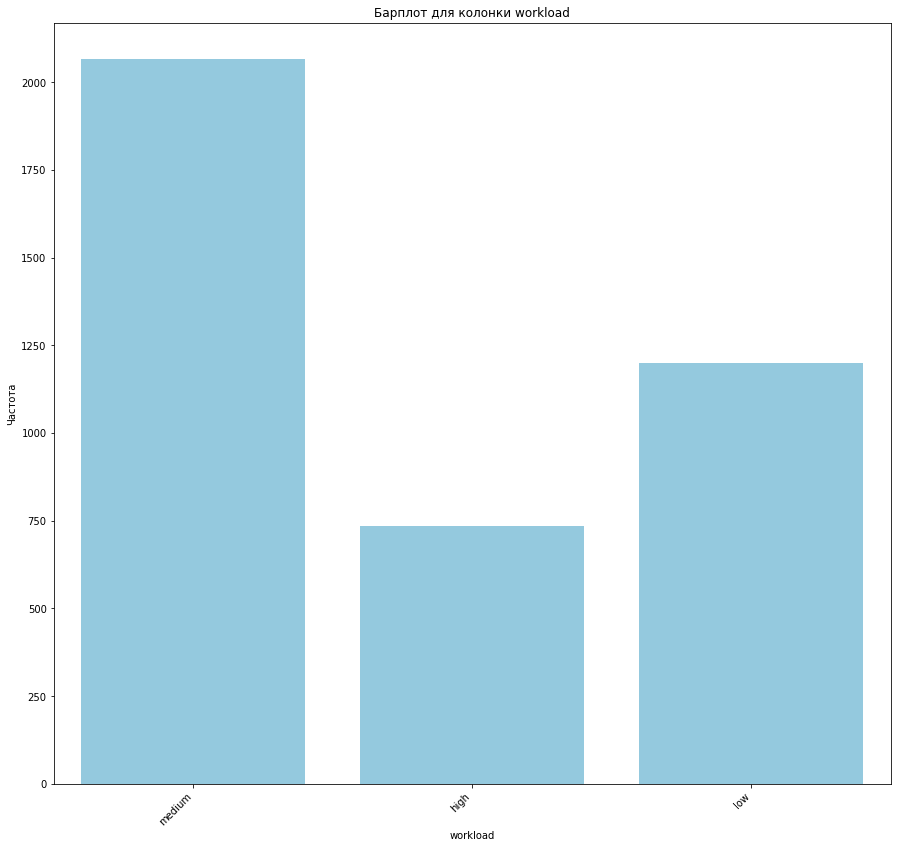

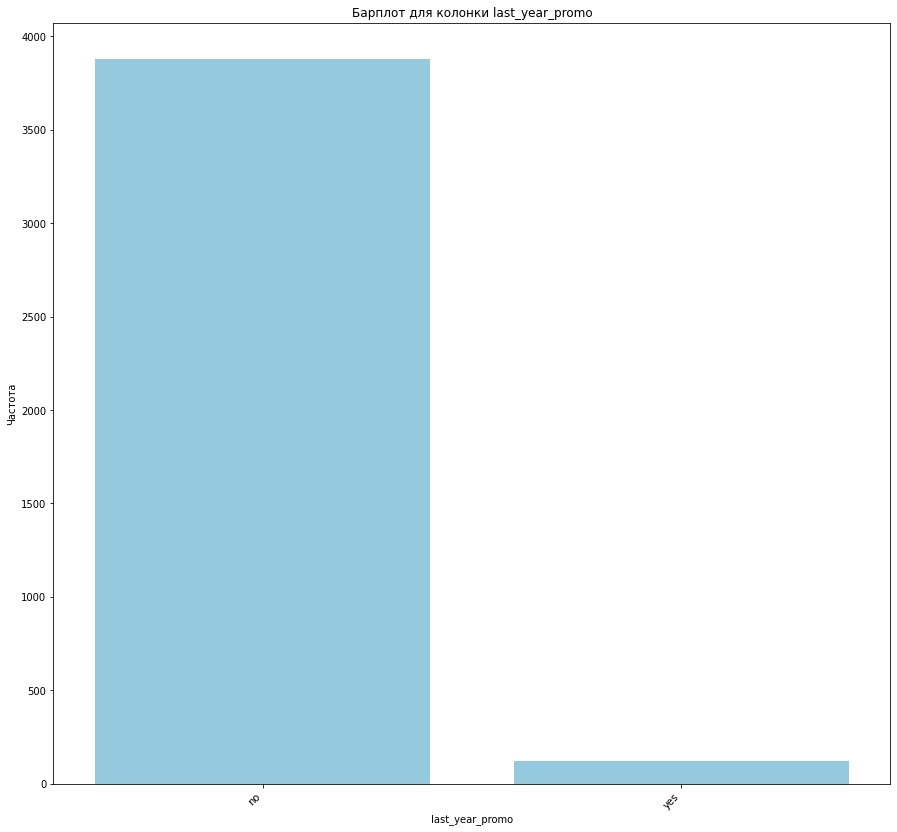

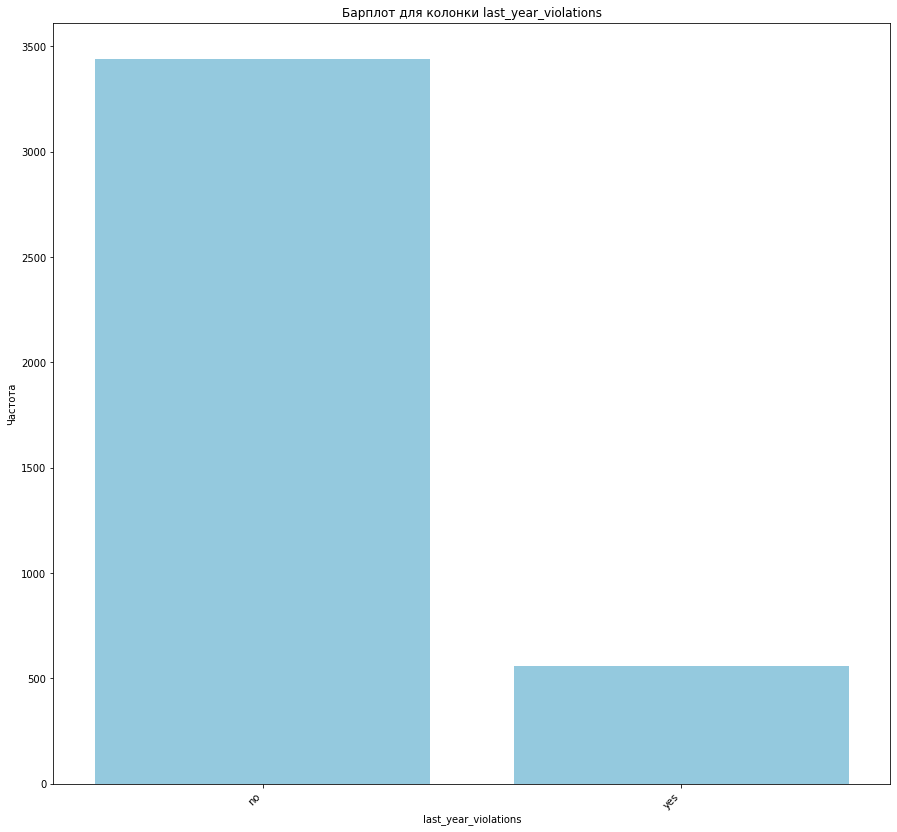

In [4]:
info_about_df(data_train.drop('id', axis=1))

In [5]:
try:
    data_test = pd.read_csv('/datasets/test_features.csv')
except:
    data_test = pd.read_csv('C:/Users/simuk/Desktop/IT/проект/test_features.csv')

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,marketing,junior,medium,2,no,no,5,28800
1,hr,junior,medium,1,no,no,4,30000
2,sales,middle,low,5,no,no,4,19200
3,sales,middle,low,6,no,no,4,19200
4,hr,middle,medium,5,no,no,5,40800
5,purchasing,middle,medium,6,no,no,3,42000
6,technology,junior,medium,3,no,no,3,26400
7,sales,middle,high,9,no,no,4,49200
8,marketing,middle,high,3,no,yes,4,62400
9,sales,junior,medium,1,no,yes,3,26400


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


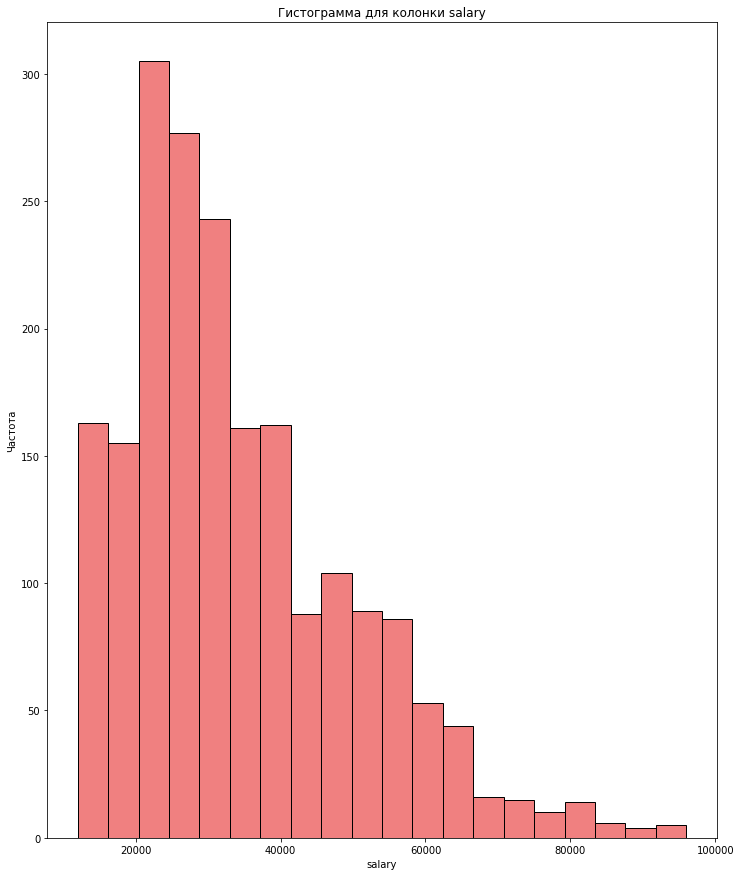

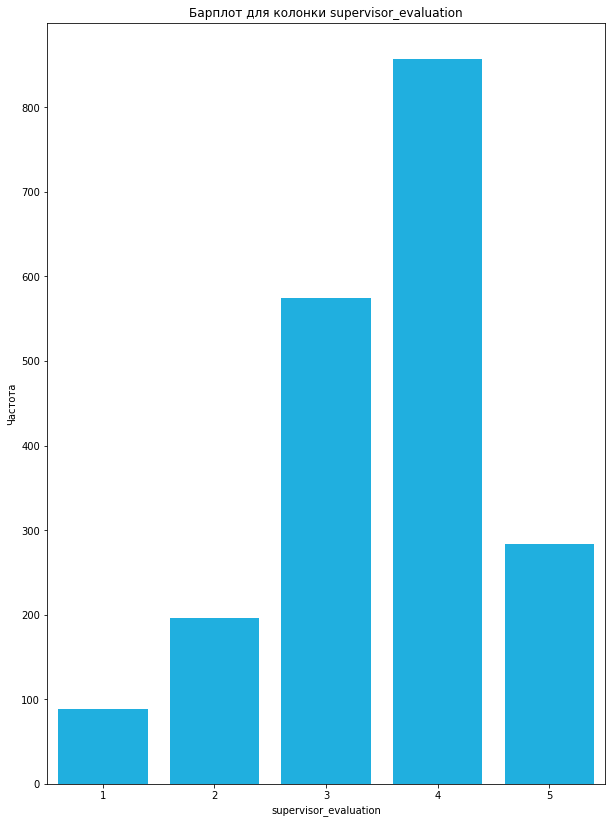

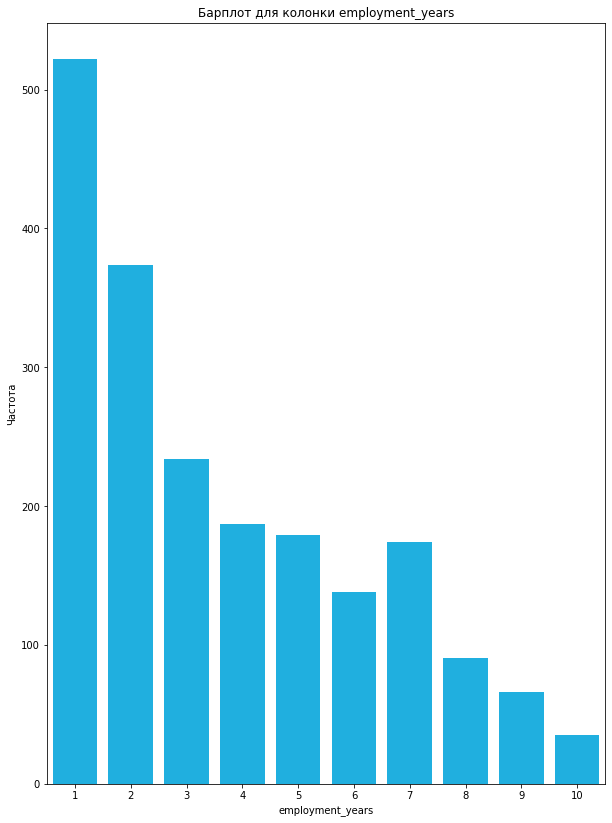

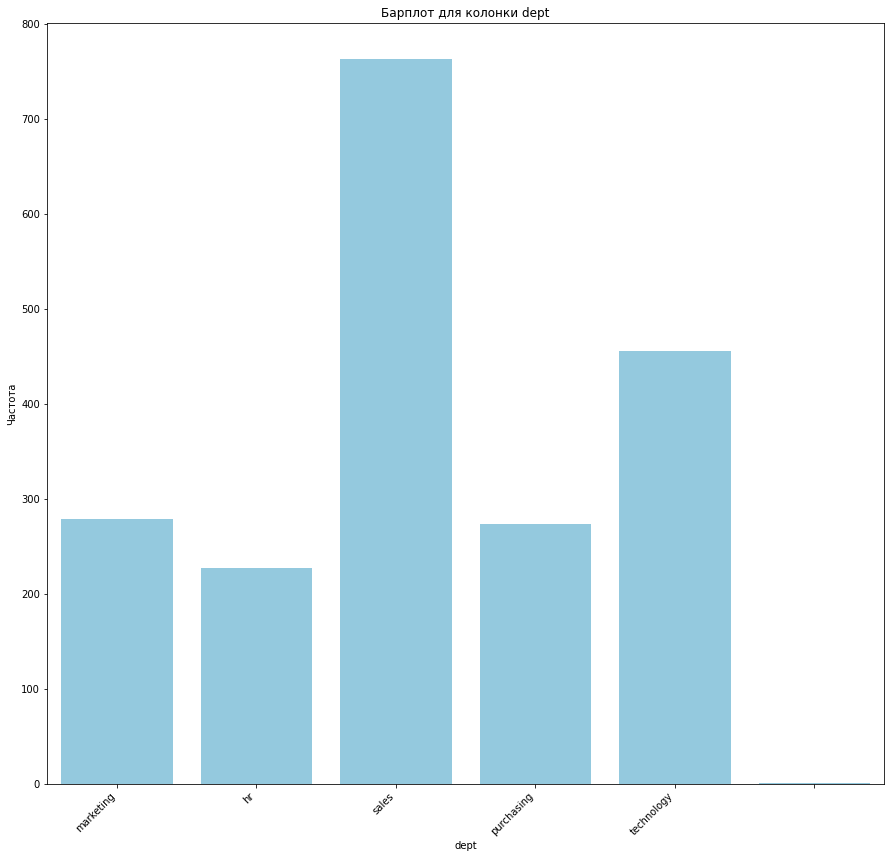

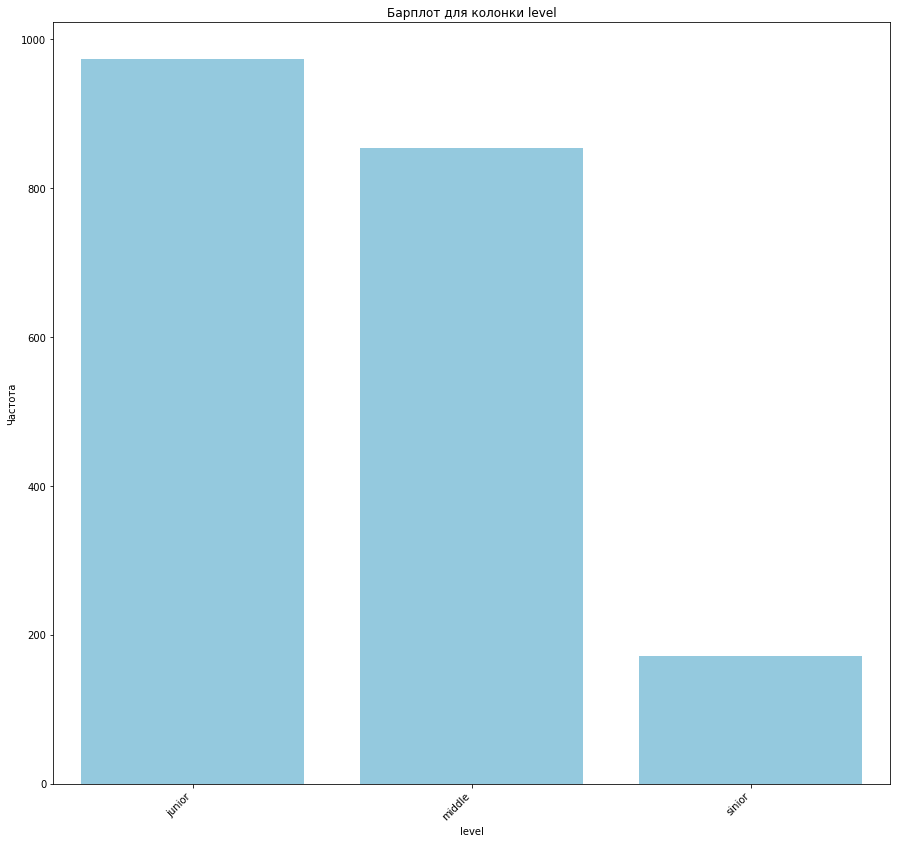

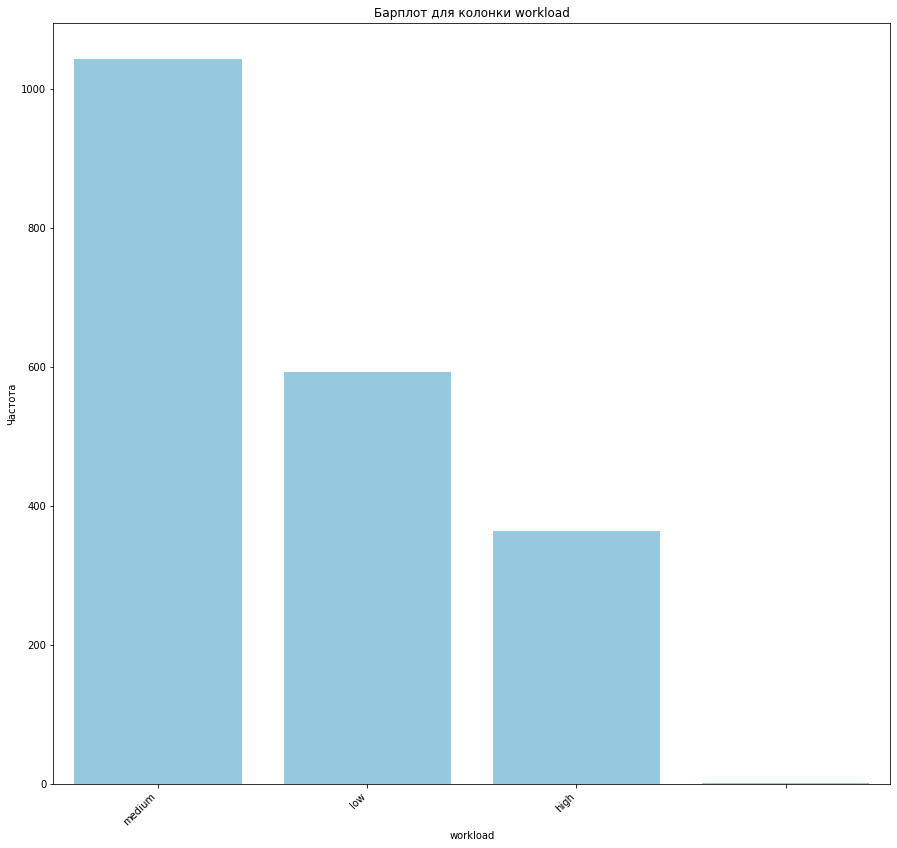

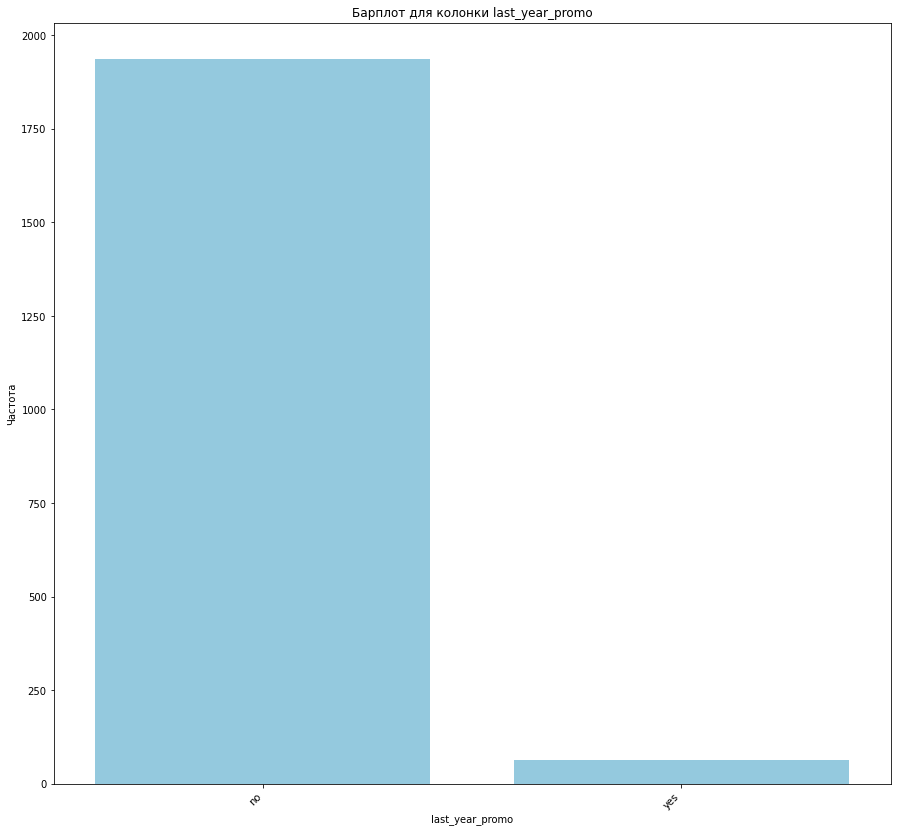

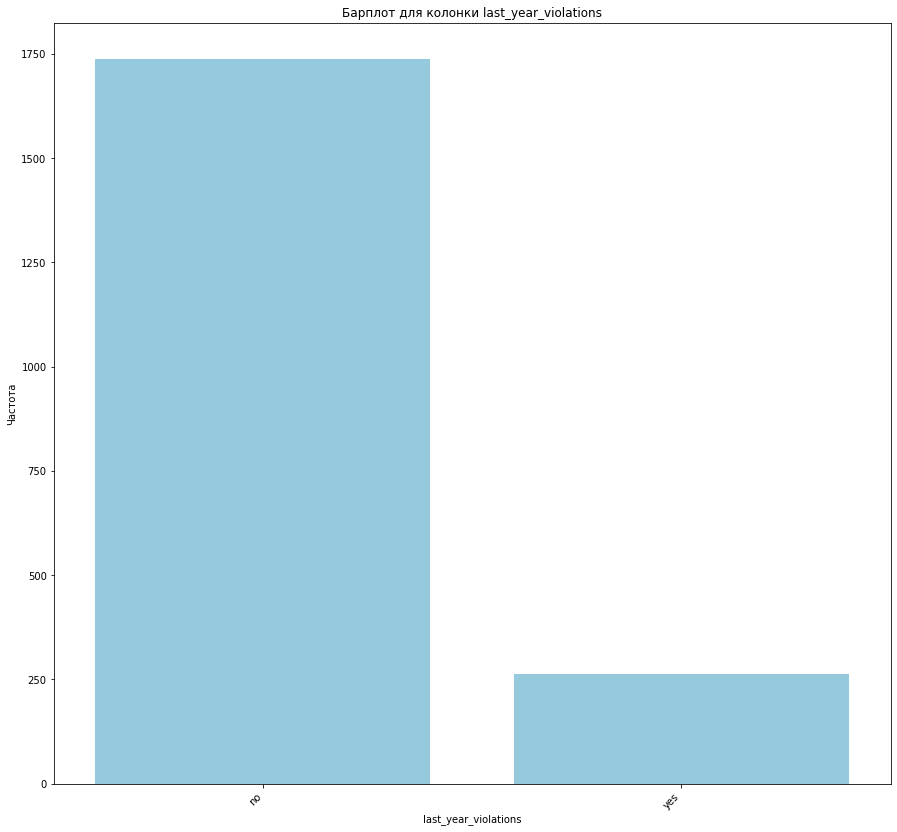

In [6]:
info_about_df(data_test.drop('id', axis=1))

In [7]:
try:
    data_puporse = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
except:
    data_puporse = pd.read_csv('C:/Users/simuk/Desktop/IT/проект/test_target_job_satisfaction_rate.csv')

In [8]:
data_puporse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


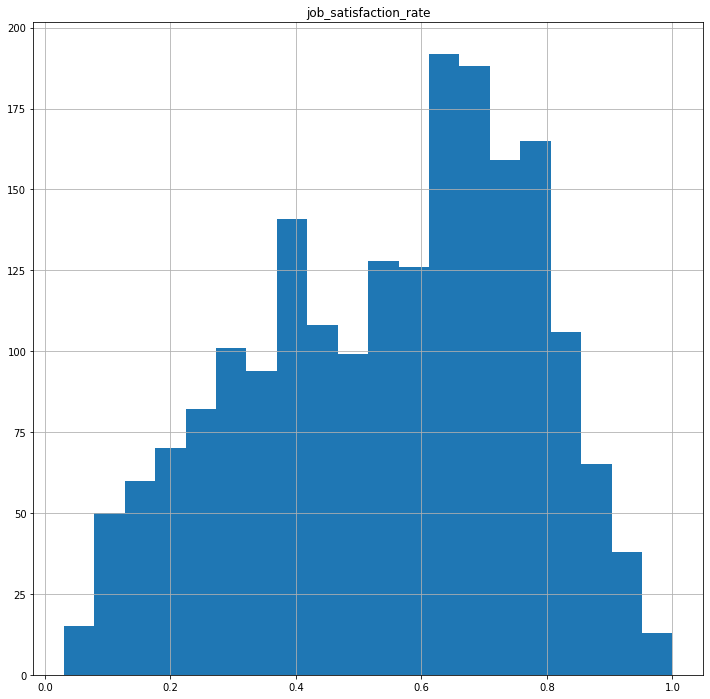

In [9]:
data_puporse.drop('id', axis=1).hist(bins=20, figsize=(12, 12));

Выводы первичного анализа:

- В тренировочных и тестовых данных есть пропуски, необходимо провести предобработку данных. 
- Видимых на графиках аномалий не обнаружено. 
- Уровень удовлетворённости сотрудников не однороден. Большое число респондентов ответило от 50% удовлетворены, но другая доля менее 50% и разница между ними не вилика. 
- Большая часть сотрудников получают менее 40000 рублей, что может быть причиной уволнений. Для уточнения данной гипотезы необходимы данные о регионе расположения офисов компании и сравнении их с медианной зарплатой в регионе. 
- Оценка работы от начальника чаще всего имеет значение 3 и 4. Недостаток признание со стороны руководства также может вызвать поетрю мотивации и увеличить количество увольнений.
- Можно утверждать, что в компании наблюдается текучка кадров, так как большая часть работников тут работает 1-2 года. 
- Большая часть сотрудников работает в отделе продаж и маркетинга
- В основном на компанию раотают джуны и мидлы. У джунов может быть высокая текучка, если их не повышают. 
- Большая часть сотрудников оценивают свою загруженность, как среднюю. Важно, что работников с лёгкой нагрузкой совсем не много, как и сотрудников с высокой загруженностью. 
- Менее 500 сотрудников получали повышение за последний год. Это может негативно сказаться на их мотивации.
- Около 600 сотрудников нарушили трудовой договор в этом году. Понижение усидчивости к правилам может быть маркером того, что у сотрудника снизилась мотивация. 

# Предобработа_данных

In [10]:
list_df = [data_test, data_train]

In [11]:
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


In [12]:
data_test.info()
data_test.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


**Функции**

In [13]:
def unique_dublicates(name):
    object_columns = name.select_dtypes(include='object').columns
    for column in object_columns:
        print(column)
        print(name[column].unique())
        print()

In [14]:
def dublicats(name):
    print(name.duplicated().sum())
    name = name.drop_duplicates()
    return name

In [15]:
def unique_dublicates(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for i in categorical_columns:
        print(i)
        print(df[f'{i}'].unique())

In [16]:
def anomaly(df):
    object_columns = df.select_dtypes(exclude='object').columns
    for column in object_columns:
        
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()
        print(df[column].describe())


Предобработка

In [17]:
for i in list_df:
    print(i.isna().sum().sort_values(ascending = False))
    print()

dept                     2
level                    1
id                       0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

dept                     6
level                    4
id                       0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64



Пропуски могут быть вызваны тем, что сотрудник работает в ином отделе и не имеет своего уровня, но для правдоподобности следует изучить детально эти столбцы, так как их не много.

In [18]:
data_train.shape

(4000, 10)

In [19]:
data_test.shape

(2000, 9)

In [20]:
data_train = dublicats(data_train)

0


In [21]:
data_train.shape

(4000, 10)

In [22]:
data_test = dublicats(data_test)

0


In [23]:
data_test.shape

(2000, 9)

In [24]:
unique_dublicates(data_train)

dept
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
level
['junior' 'middle' 'sinior' nan]
workload
['medium' 'high' 'low']
last_year_promo
['no' 'yes']
last_year_violations
['no' 'yes']


In [25]:
unique_dublicates(data_test)

dept
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level
['junior' 'middle' 'sinior' nan]
workload
['medium' 'low' 'high' ' ']
last_year_promo
['no' 'yes']
last_year_violations
['no' 'yes']


In [26]:
data_test['dept'].value_counts()

sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64

In [27]:
data_test['workload'].value_counts()

medium    1043
low        593
high       363
             1
Name: workload, dtype: int64

In [28]:
data_test.loc[data_test['dept'] == ' ']

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1699,822186,,middle,medium,3,no,no,4,38400


In [29]:
data_test.loc[data_test['workload'] == ' ']

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,,4,no,no,4,28800


In [30]:
data_test['dept'] = data_test['dept'].replace(' ', 'sales')
data_test['workload'] = data_test['workload'].replace(' ', 'medium')

In [31]:
data_test['dept'].value_counts()

sales         764
technology    455
marketing     279
purchasing    273
hr            227
Name: dept, dtype: int64

In [32]:
data_test['workload'].value_counts()

medium    1044
low        593
high       363
Name: workload, dtype: int64

Обнаружено два неявных дубликата в тестовых данных. Для дальнейшей работы пропущенные знаечния были заменены самым встречающимся в соотвествующих категориях. 

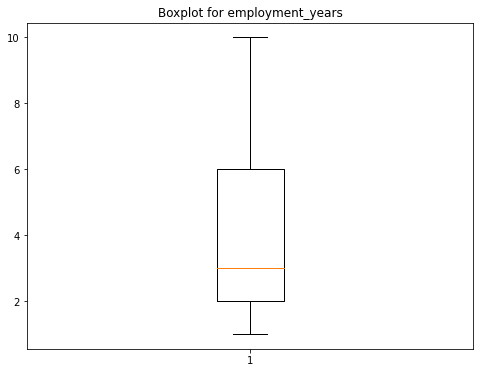

count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


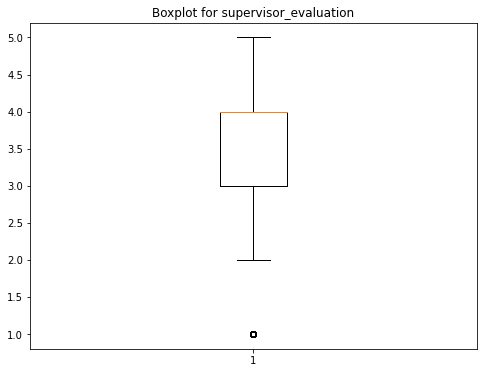

count    4000.000000
mean        3.476500
std         1.008812
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


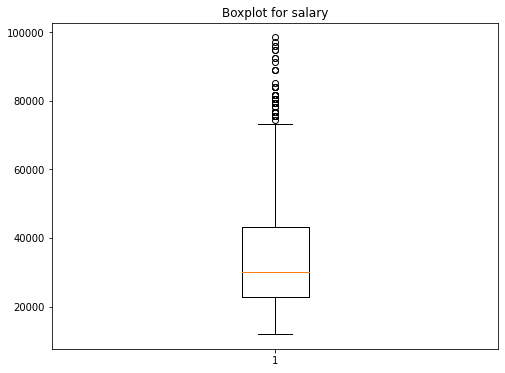

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64


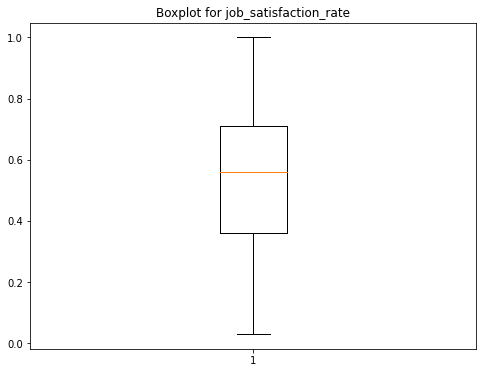

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


In [33]:
anomaly(data_train.drop('id', axis=1))

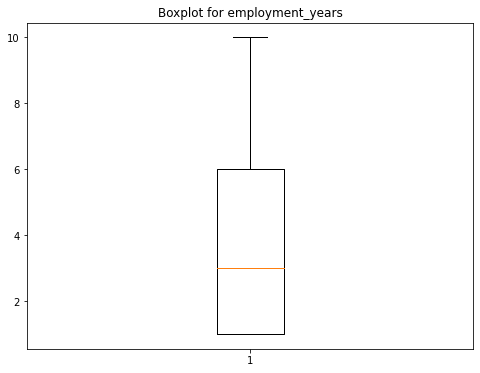

count    2000.000000
mean        3.666500
std         2.537222
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


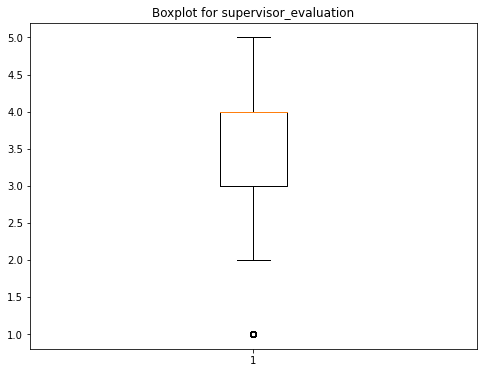

count    2000.000000
mean        3.526500
std         0.996892
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64


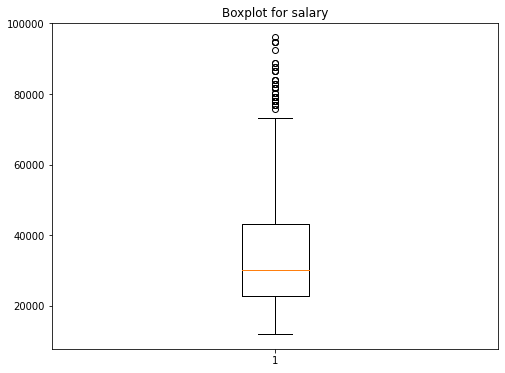

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


In [34]:
anomaly(data_test.drop('id', axis=1))

- аномалии не обнаружены. 
- имеет смысл при исследовательском анализе данных разделить датасеты на тех, кто получает больше 50000 р и тех, кто меньше. 

**Итог предобработки данных:**
- В данных были обнаружены пропуски в колонках Dept и Levels. Эти пропуски могли возникнуть как по технической ошибке, так и по человеческой. 
- Явных дубликатов нет. Были неявные дубликаты в тестовых данных. Всего три дубликата, которые можно классифицировать, как пропуски. Данные с ними были заменены на самые встречающиеся в датасете. 
- Аномалии не обнаружены. 
- Размер тренировочного датасета до обработки: 4000, 10. 
- Размер тренировочного датасета после обработки: 3990, 10. 
- Размер тестового датасета до обработки: 2000, 9. 
- Размер тестового датасета после обработки: 1997, 9. 

**Рекомендация техническому отделу:**
- Создать в базе данных функцию, которая будет не давать пропускать в себя данные с пропусками. Данные с пропусками могут критично отразиться на анализе и работе бухгалтерии. 

# Исследовательский_анализ_данных

In [35]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 343.8+ KB


In [36]:
data_train.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


**Функции**

In [37]:
def histagramma(m, name):
    counts = m[f'{name}']
    print(counts.describe())
    plt.figure(figsize=(10, 6))
    plt.hist(counts, bins=30, edgecolor='black', alpha=0.7)
    plt.axvline(np.median(counts), color='red',
                linestyle='dashed', linewidth=2, label='Медиана')
    plt.axvline(np.mean(counts), color='green',
                linestyle='dashed', linewidth=2, label='Среднее')
    plt.axvline(np.percentile(counts, 25), 
                color='orange', linestyle='dashed', linewidth=2, label='1-й квартиль')
    plt.axvline(np.percentile(counts, 75),
                color='blue', linestyle='dashed', linewidth=2, label='3-й квартиль')
        
    plt.legend()

    plt.title(f'{name}')
    plt.xlabel(f'Значения')
    plt.ylabel('Частота')
    plt.show()
    

In [38]:
def create_barplot(dataframe, column_name):
    print(dataframe[column_name].value_counts())
    plt.figure(figsize=(10, 6))
    dataframe[column_name].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Барплот для столбца "{column_name}"')
    plt.xlabel(column_name)
    plt.ylabel('Количество')
    plt.show()

In [39]:
def pie(n, m):
    breed_counts = n[f'{m}'].value_counts()
    print(breed_counts)
    plt.pie(breed_counts, labels=breed_counts.index, autopct='%1.1f%%', startangle=140)

    plt.title(f'Круговая диаграмма распределения для показателя {m}')


    plt.show()

In [40]:
def link(df, name, target):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df[f'{name}'], y=df[f'{target}'], data=df)
    plt.title('Scatter Plot для {name} и {target}')
    plt.show()

In [41]:

def mean_target(df, target, param):
    mean_target_by_param = df.groupby(param)[target].mean().reset_index()

    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(x=param, y=target, data=mean_target_by_param)
    plt.title(f'Average {target} by {param}')
    plt.xlabel(param)
    plt.ylabel(f'Average {target}')

    # Добавление подписей значений над каждым столбцом
    for index, value in enumerate(mean_target_by_param[target]):
        barplot.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

    plt.show()



In [42]:
pie_list = ['last_year_promo', 'last_year_violations']
bar_list = ['dept', 'level', 'supervisor_evaluation', 'employment_years', 'workload']
hist_list = ['salary', 'job_satisfaction_rate']

Pie графики

no     3880
yes     120
Name: last_year_promo, dtype: int64


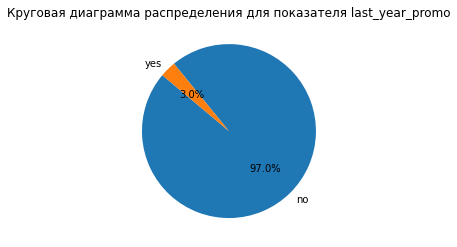

no     3441
yes     559
Name: last_year_violations, dtype: int64


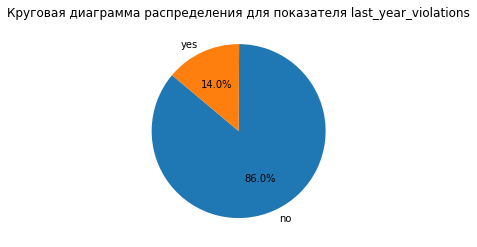

In [43]:
for n in pie_list:
    pie(data_train, n)

Bar графики

sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64


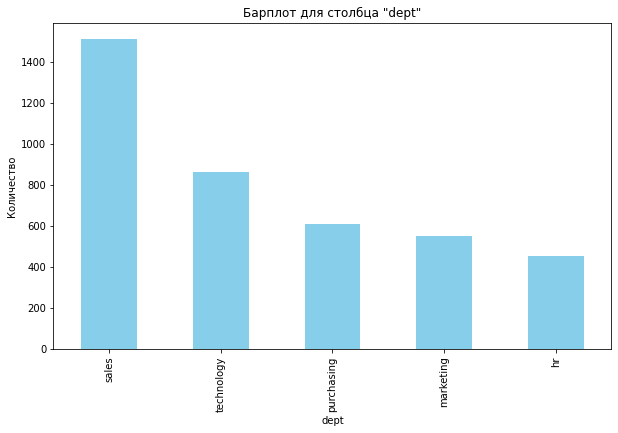

junior    1894
middle    1744
sinior     358
Name: level, dtype: int64


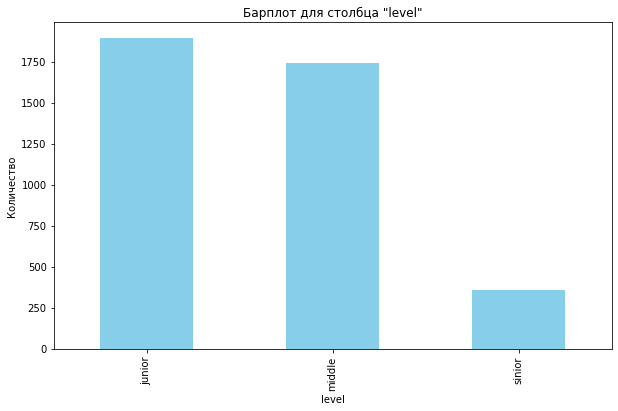

4    1603
3    1263
5     546
2     387
1     201
Name: supervisor_evaluation, dtype: int64


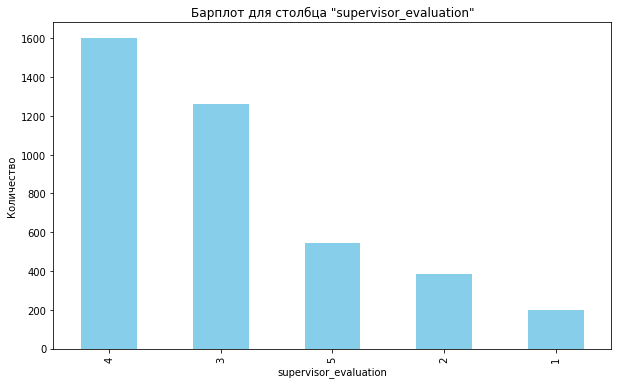

1     966
2     785
3     483
4     384
5     380
7     301
6     287
8     193
9     130
10     91
Name: employment_years, dtype: int64


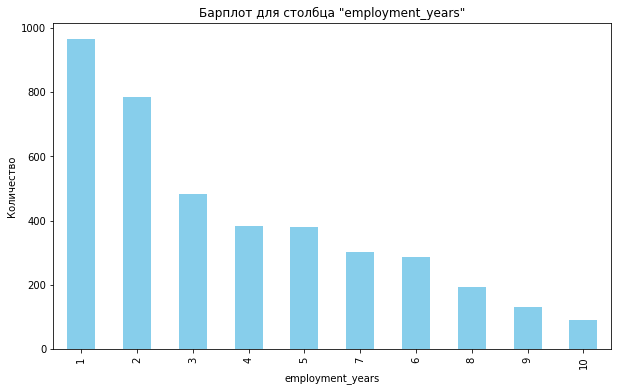

medium    2066
low       1200
high       734
Name: workload, dtype: int64


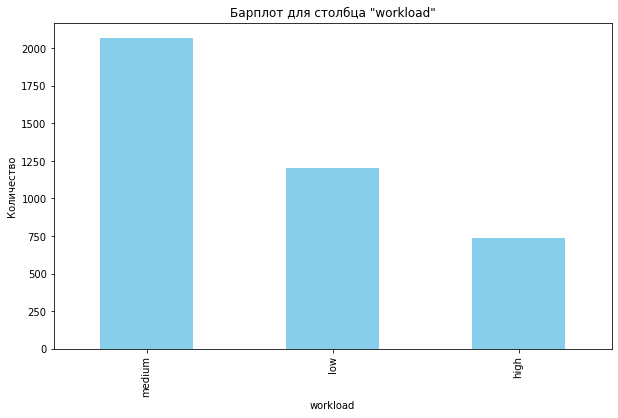

In [44]:
for n in bar_list:
    create_barplot(data_train, n)

Гистограммы

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64


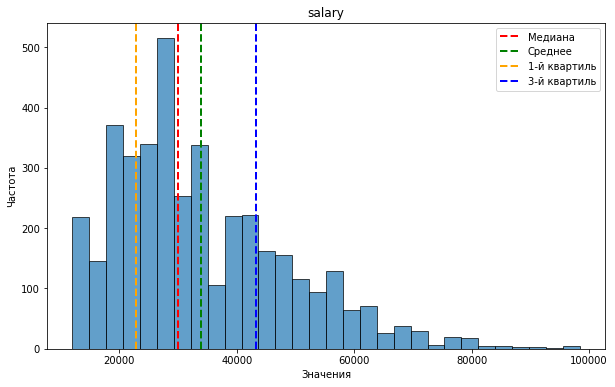

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


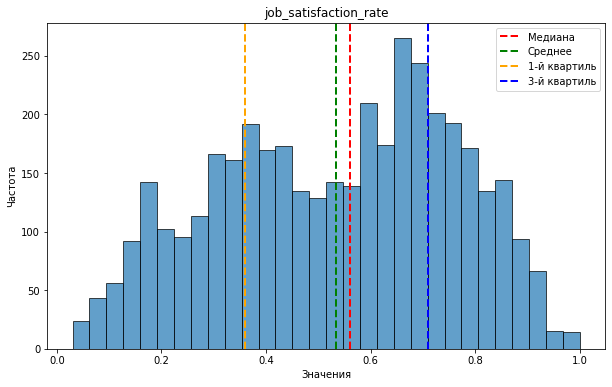

In [45]:
for n in hist_list:
    histagramma(data_train, n)

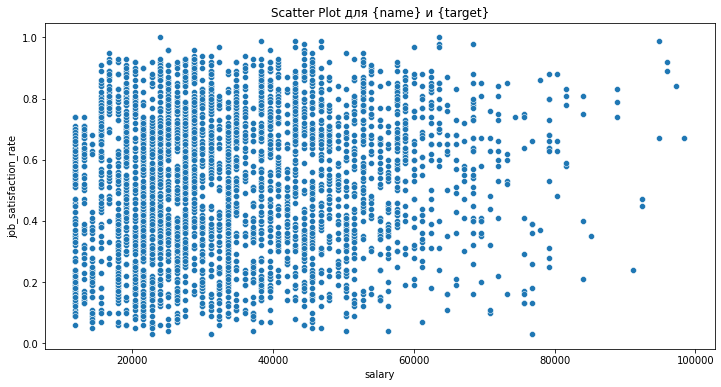

In [46]:
link(data_train, 'salary', 'job_satisfaction_rate')

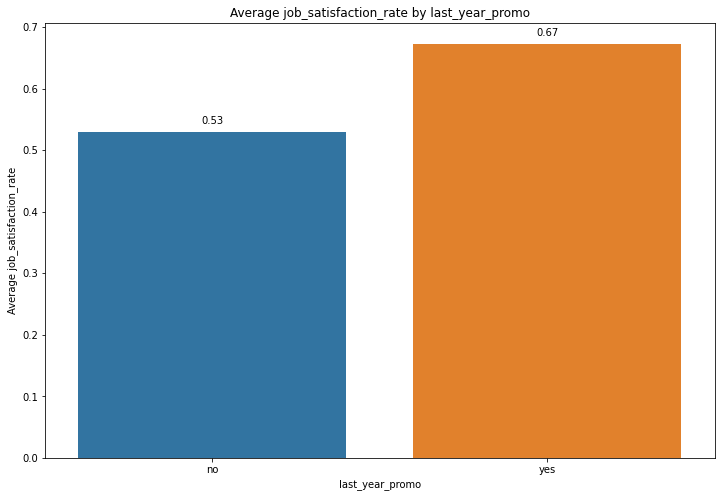

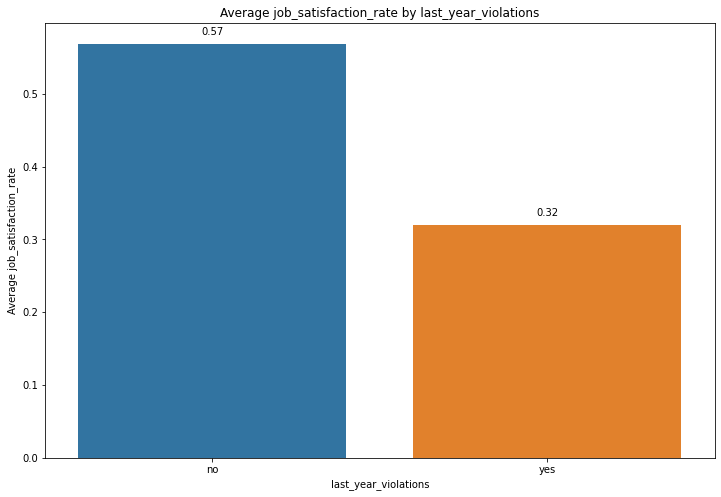

In [47]:
for i in pie_list:
    mean_target(data_train, 'job_satisfaction_rate', i)

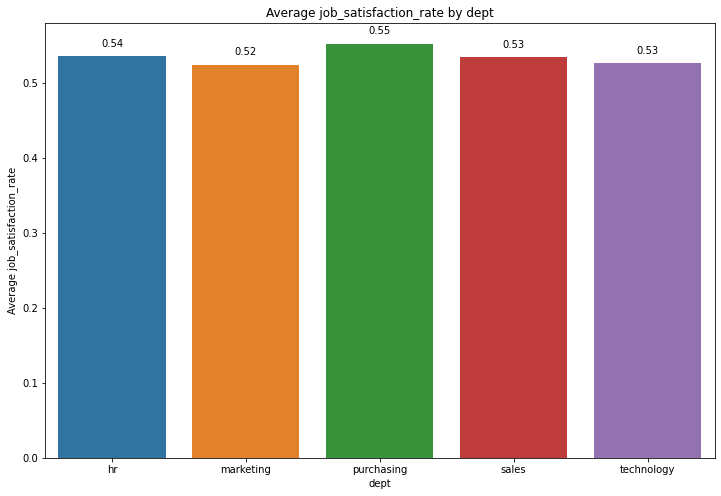

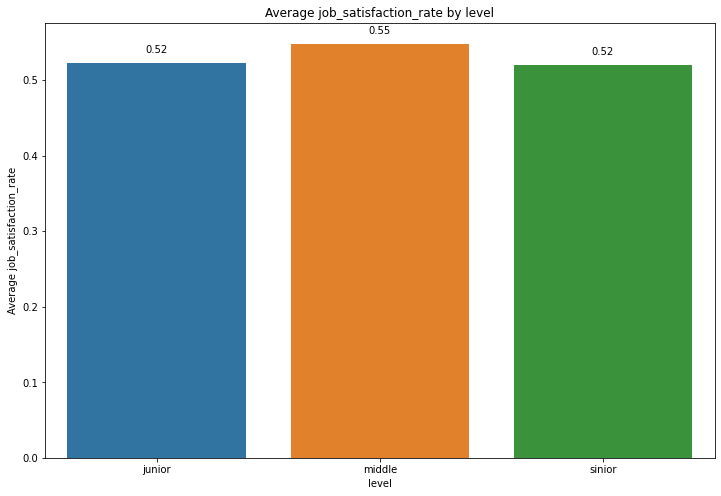

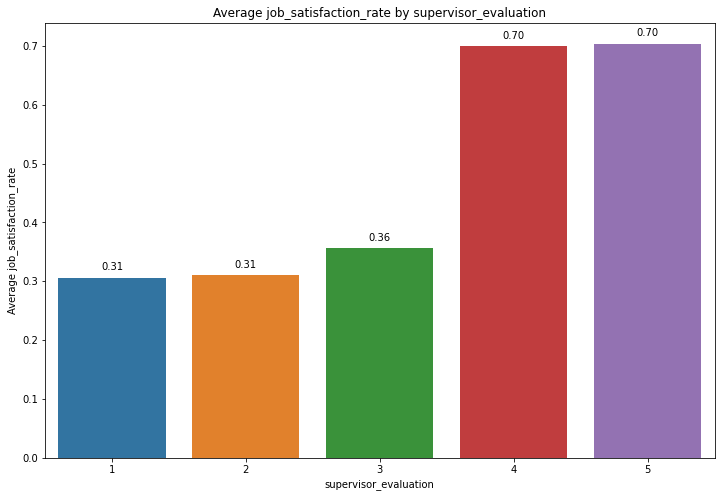

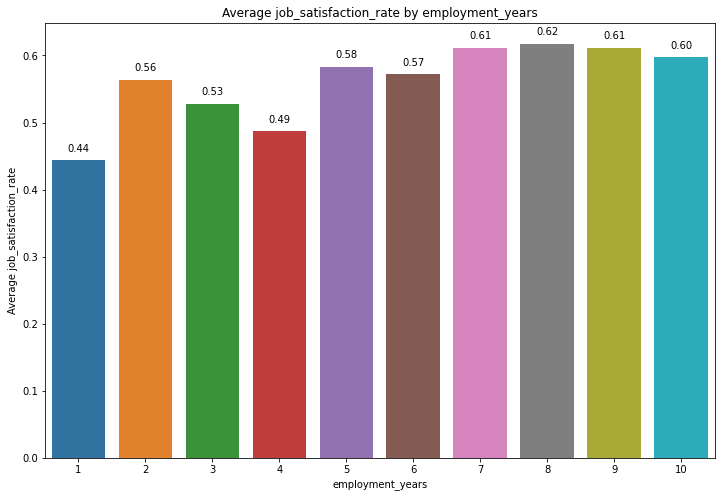

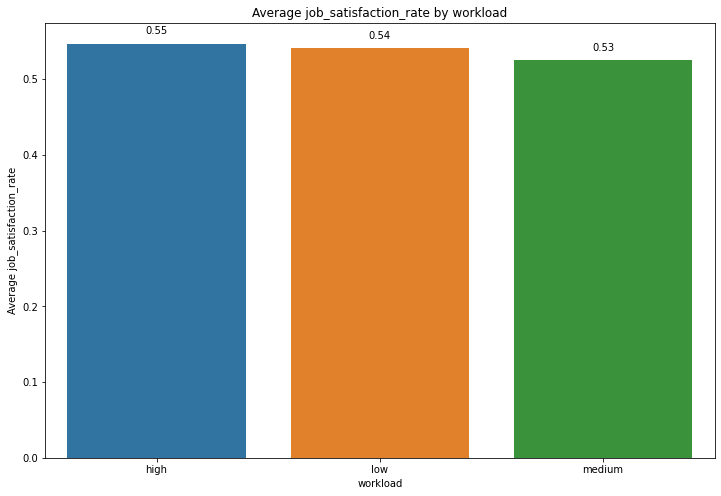

In [48]:
for i in bar_list:
    mean_target(data_train, 'job_satisfaction_rate', i)

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


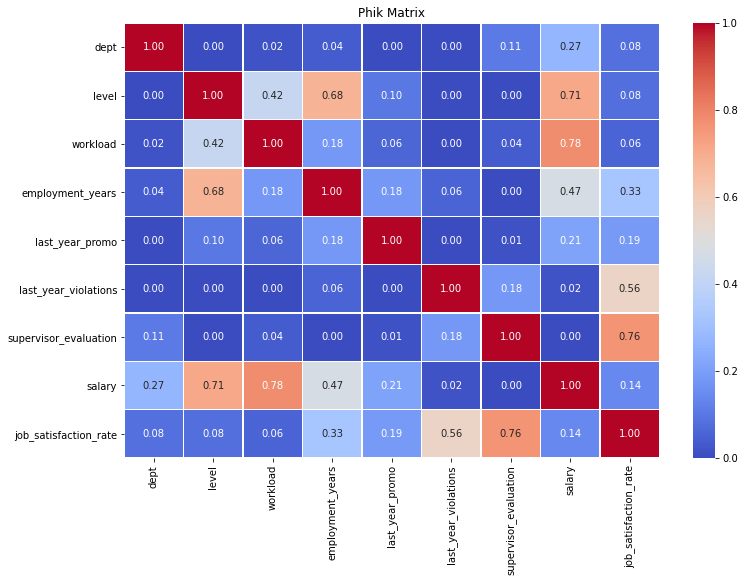

In [49]:
phik_matrix = data_train.drop('id', axis=1).phik_matrix()

plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Phik Matrix')
plt.show()

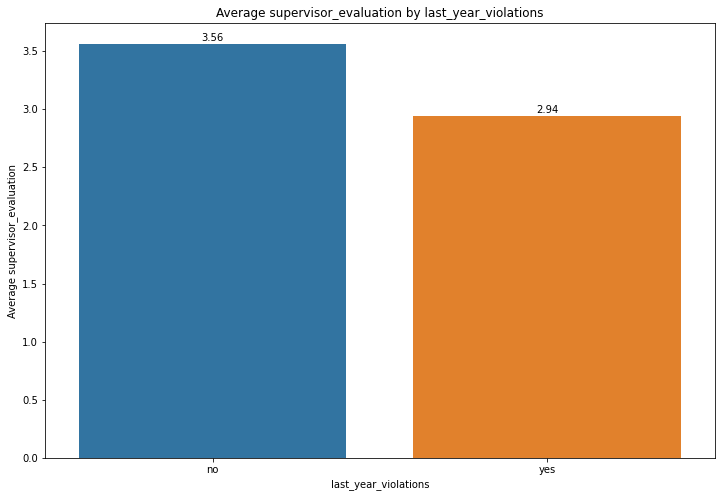

In [50]:
mean_target(data_train, 'supervisor_evaluation', 'last_year_violations')

**Выводы:**
- Премию получило только 3% сотрудников. 
- 14% сотруников нарушило трудовой договор.
- Зарплата очень слабо влияет на уровень довольства сотрудника.
- Сотрудники, получившие премию в среднем довольнее сотрудников без премии на 14%.
- Сотрудники, нарушившие трудовой договор менее довольны, чем правопорядочные на 25%. Это серьёзная разница, которую следуе учитывать.
- Между отделами существенная разница не обнаружена, а значит эта проблема повсеместная.
- Между уровнем должности также не зафиксирована особая разница, что может говорить о том, что сотрудники разных должностей испытывают схожие проблемы. 
- Наименее довольные сотрудники, работающие первый и четвёртый год в компании. Следует проверить не ли у них одного и того же начальника. (см. следующий пункт)
- Важнейшим фактором является оценка, которую дают начальники своим работникам. Если у групп 1 и 4 года есть один и тот же начальник, то следует его проверить на проф пригодность. 
- Однако далеко не все работники, нарушевшие трудовой договор получили низкую оценку от начальства. 

**Рекомендации бизнесу:**

1. Для повышения довольности сотрудников следует проверить как даётся обратная связь от руководства своим подчинённым, и если имеет место грубое обращение, переход личных границ и иные элементы морально-физического унижения, то надо провести работу с лицом, либо уволить его. 
2. Проведение стресс-тренингов также может помочь сотрудникам адаптироваться к стрессовым ситуациям. 
3. Для принятия решения о преобритении стресс-менеджмент курсов рекомендуем провести исследования, которое скажет, сколько денег сможет сэкономить на этом компания.
4. Рекомендуем дополнительно проводить работу с новичками (до 5 ти лет работы в компании), так как они также чаще бывают недовольны. Особенно стоит обратить на работников, только пришедших в компанию. 
5. Для адаптации новичков можно обсудить с экспертами, как сделать адаптацию мягче.
6. Следует отдельно исследовать причины наруения трудового договора сотрудниками, так как они как раз часто являются теми, кто остаётся не доволен. 
7. Можно увеличить количество выдаваемых премий для сотрудников, уровень довольсва которых наиболее важен (эффективные кадры, ключевые фигуры в проектах)
8. Также для особо важных сотрудников следует проверять, какую обратную связь даёт им руководство.
9. Для повышения эффективнсти дачи обратной связи можно провести тренинг на эту тему или хотя бы обозначить основные моменты на совещании. 

# Модель_1

In [51]:
data_train.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [52]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 343.8+ KB


In [53]:
ordinal_list = ['level', 'workload', 'employment_years',
                 'last_year_promo', 'last_year_violations', 'supervisor_evaluation']
onehot_list =['dept']
num_list = ['salary']

In [54]:
X = data_train.drop(['id', 'job_satisfaction_rate'], axis=1)
y = data_train['job_satisfaction_rate']

In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE, stratify=y)

In [87]:
def smape(y_true, y_pred):
    return 1 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)) * 100)

smape_score = make_scorer(smape)

In [57]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(sparse=False, drop='first', handle_unknown="ignore")
        )
    ]
) 

In [58]:
ord_pipe = Pipeline([
            (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
    ('ord',  OrdinalEncoder(categories=[
        ['junior', 'middle', 'sinior'],
        ['low', 'medium', 'high'],
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        ['no', 'yes'],
        ['no', 'yes'],
        [1, 2, 3, 4, 5]],
        handle_unknown='use_encoded_value',
        unknown_value=np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])


In [59]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, onehot_list),
        ('ord', ord_pipe, ordinal_list),
        ('num', MinMaxScaler(), num_list)
    ], 
    remainder='passthrough'
) 

In [60]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
) 

In [61]:
param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__min_samples_split':range(1, 5),
        'models__min_samples_leaf':range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }]


In [62]:
grid_search = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring=smape_score,
    n_jobs=-1
)
model = grid_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', model.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', model.best_score_)


c:\Users\simuk\practicum\practicum_env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 735.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\simuk\practicum\practicum_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\simuk\practicum\practicum_env\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\simuk\practicum\practicum_env\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                         

In [63]:

cv_results = grid_search.cv_results_


valid_scores = np.where(np.isfinite(cv_results['mean_test_score']))
worst_index = valid_scores[0][np.argmin(cv_results['mean_test_score'][valid_scores])]


worst_score = cv_results['mean_test_score'][worst_index]
worst_params = cv_results['params'][worst_index]

print('Худшая модель и её параметры:\n\n', worst_params)
print('Худшая метрика на тренировочной выборке:', worst_score)


Худшая модель и её параметры:

 {'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 4, 'models__min_samples_leaf': 1, 'models__min_samples_split': 2, 'preprocessor__num': StandardScaler()}
Худшая метрика на тренировочной выборке: 21.33118025343479


In [64]:
best_pipeline = model.best_estimator_

In [65]:
cv_scores = cross_val_score(best_pipeline, X, y, cv=5, scoring=smape_score)
cv_scores

array([25.19679662, 25.7654294 , 25.76464771, 25.20478539, 23.21061561])

In [66]:
cv_scorers_valid = cross_val_score(best_pipeline, X_valid, y_valid, cv=5, scoring=smape_score)
cv_scorers_valid

array([25.64650346, 25.15788511, 25.78272827, 24.52286571, 25.0952475 ])

In [67]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, onehot_list),
        ('ord', ord_pipe, ordinal_list),
        ('num', StandardScaler(), num_list)
    ], 
    remainder='passthrough'
) 

In [68]:
tree_params = {
    'models__max_depth': 4,
    'models__min_samples_split': 2,
    'models__min_samples_leaf': 1
}


pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])


pipe_final.set_params(**tree_params)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',...
                                                                                               'yes'],
                                                                                              [1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5]],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload',
                                                   'employment_years',
                                                   'last_year_promo',
                                                   'last_year_violations',
                                                   'supervisor_evaluation']),
                                                 ('num', StandardScaler(),
                                                  ['salary'])])),
                ('models',
                 DecisionTreeRegressor(max_depth=4, random_state=42))])

In [69]:
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',...
                                                                                               'yes'],
                                                                                              [1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5]],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload',
                                                   'employment_years',
                                                   'last_year_promo',
                                                   'last_year_violations',
                                                   'supervisor_evaluation']),
                                                 ('num', StandardScaler(),
                                                  ['salary'])])),
                ('models',
                 DecisionTreeRegressor(max_depth=4, random_state=42))])

In [70]:
cv_scores = cross_val_score(pipe_final, X, y, cv=5, scoring=smape_score)
cv_scores

array([21.53259742, 21.62440278, 21.77286001, 21.47956553, 20.36547057])

In [71]:
cv_scorers_valid = cross_val_score(pipe_final, X_valid, y_valid, cv=5, scoring=smape_score)
cv_scorers_valid

array([21.49324726, 24.11168607, 23.10314498, 21.69312134, 23.44946342])

На валидационной и тренировочной выборке значения модели показали результат выше 15, что является признаком хорошего качества модели. 

In [100]:
X_test = data_test.drop(['id'], axis=1)
y_test = data_puporse.drop(['id'], axis=1)

TypeError: explode() missing 1 required positional argument: 'column'

In [92]:
X_test.shape

(2000, 8)

In [99]:
y_test

array([[0.74],
       [0.75],
       [0.6 ],
       ...,
       [0.39],
       [0.26],
       [0.62]])

In [95]:
predictions = model.predict(X_test)
predictions

array([0.76112443, 0.63894687, 0.55172329, ..., 0.39670489, 0.3308107 ,
       0.51068465])

In [86]:
predictions_two = pipe_final.predict(X_test)
predictions_two.shape

(2000,)

In [103]:
def smape_two(y_true, y_pred):
    """
    Вычисляет значение метрики SMAPE.

    Параметры:
    - y_true: массив NumPy или объект Series в pandas с фактическими значениями
    - y_pred: массив NumPy или объект Series в pandas с прогнозными значениями

    Возвращает:
    - Значение метрики SMAPE
    """
    assert len(y_true) == len(y_pred), "Длины массивов должны быть одинаковыми"

    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2

    elementwise_smape = np.divide(numerator, denominator, out=np.zeros_like(numerator), where=denominator != 0)
    smape_value = np.mean(elementwise_smape) * 100

    return smape_value

In [104]:
smape_two(y_test, predictions)

47.74653080471326

In [105]:
smape_two(y_test, predictions_two)

48.181059934139114